<a href="https://colab.research.google.com/github/therealfortune/tensorflow-fortune/blob/master/Sign_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 101MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 82.5MB/s]


In [3]:
def get_data(fname):
  with open(fname) as training_file:
    reader = csv.reader(training_file, delimiter=',')
    first_line = True
    imgs = []
    labels = []

    for row in reader:
      if first_line:
        first_line = False
      else:
        labels.append(row[0])
        img = row[1:]
        img_data_to_array = np.array_split(img, 28)
        imgs.append(img_data_to_array)

    images = np.array(imgs).astype('float')
    labels = np.array(labels).astype('float')

    return images, labels

training_images, training_labels = get_data('/content/sign_mnist_train.csv')
testing_images, testing_labels = get_data('/content/sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range = 0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale = 1./255
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=10
)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=10
)

In [6]:
from tensorflow.python.ops.math_ops import to_bfloat16
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(62, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(26, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 62)        35774     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 62)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1550)              0         
                                                                 
 dense (Dense)               (None, 512)               7

In [7]:
model.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [8]:
history = model.fit_generator(
    train_generator,
    epochs = 15,
    validation_data = validation_generator,
    verbose=1
)

model.evaluate(testing_images, testing_labels)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


2746/2746 [==============================] - 41s 10ms/step - loss: 2.5891 - acc: 0.2023 - val_loss: 1.4591 - val_acc: 0.5056
Epoch 2/15
2746/2746 [==============================] - 28s 10ms/step - loss: 1.6923 - acc: 0.4482 - val_loss: 0.8811 - val_acc: 0.7133
Epoch 3/15
2746/2746 [==============================] - 28s 10ms/step - loss: 1.3128 - acc: 0.5652 - val_loss: 0.6731 - val_acc: 0.7648
Epoch 4/15
2746/2746 [==============================] - 28s 10ms/step - loss: 1.1015 - acc: 0.6344 - val_loss: 0.5572 - val_acc: 0.8035
Epoch 5/15
2746/2746 [==============================] - 28s 10ms/step - loss: 0.9440 - acc: 0.6876 - val_loss: 0.4908 - val_acc: 0.8371
Epoch 6/15
2746/2746 [==============================] - 28s 10ms/step - loss: 0.8449 - acc: 0.7206 - val_loss: 0.4177 - val_acc: 0.8516
Epoch 7/15
2746/2746 [==============================] - 28s 10ms/step - loss: 0.7822 - acc: 0.7392 - val_loss: 0.4310 - val_acc: 0.8390
Epoch 8/15
2746/2746 [==============================] - 28s

[287.723876953125, 0.6151701211929321]

<Figure size 432x288 with 0 Axes>

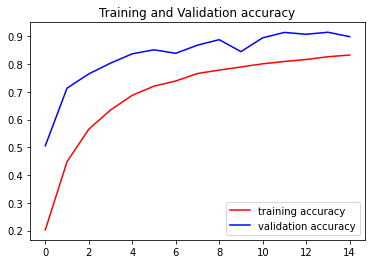

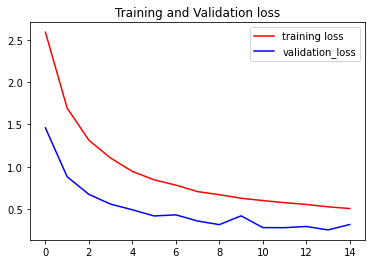

<Figure size 432x288 with 0 Axes>

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label= 'training loss')
plt.plot(epochs, val_loss, 'b', label='validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()